In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
class jet():
    def __init__(self, pt, eta, phi, mass, btag):
        self.pt = pt
        self.eta = eta 
        self.phi = phi
        self.mass = mass 
        self.btag = btag 
    def __len__(self):
        return len(self.pt)

PREFIX = 'PPTT_FHD_CR_COMPARE/parsed_file/'

with np.load(os.path.join(PREFIX, "truth_matching/event_record_cr_gluon.npz"), allow_pickle=True) as file:
    cr_gluon_jet_pt = file['jet_pt'][:]
    cr_gluon_jet_eta = file['jet_eta'][:]
    cr_gluon_jet_phi = file['jet_phi'][:]
    cr_gluon_jet_mass = file['jet_mass'][:]
    cr_gluon_jet_btag = file['jet_btag'][:]
    cr_gluon_parton_jet_index = file['parton_jet_index'][:]
    cr_gluon_N_match_top_in_event = file['N_match_top_in_event'][:]

cr_gluon_jet = jet(cr_gluon_jet_pt, cr_gluon_jet_eta, cr_gluon_jet_phi, cr_gluon_jet_mass, cr_gluon_jet_btag)

with np.load(os.path.join(PREFIX, "truth_matching/event_record_cr_qcd.npz"), allow_pickle=True) as file:
    cr_qcd_jet_pt = file['jet_pt']
    cr_qcd_jet_eta = file['jet_eta']
    cr_qcd_jet_phi = file['jet_phi']
    cr_qcd_jet_mass = file['jet_mass']
    cr_qcd_jet_btag = file['jet_btag']
    cr_qcd_parton_jet_index = file['parton_jet_index']    
    cr_qcd_N_match_top_in_event = file['N_match_top_in_event']    

cr_qcd_jet = jet(cr_qcd_jet_pt, cr_qcd_jet_eta, cr_qcd_jet_phi, cr_qcd_jet_mass, cr_qcd_jet_btag)

with np.load(os.path.join(PREFIX, "truth_matching/event_record_default.npz"), allow_pickle=True) as file:
    default_jet_pt = file['jet_pt']
    default_jet_eta = file['jet_eta']
    default_jet_phi = file['jet_phi']
    default_jet_mass = file['jet_mass']
    default_jet_btag = file['jet_btag']
    default_parton_jet_index = file['parton_jet_index']    
    default_N_match_top_in_event = file['N_match_top_in_event']    

default_jet = jet(default_jet_pt, default_jet_eta, default_jet_phi, default_jet_mass, default_jet_btag)


In [3]:
n_btag_cr_qcd = []
n_btag_cr_gluon= []
n_btag_default = []

for i in range(len(cr_gluon_jet)):
    n_btag_cr_gluon.append(np.sum(np.array(cr_gluon_jet.btag[i]) == 1))

for i in range(len(cr_qcd_jet)):
    n_btag_cr_qcd.append(np.sum(np.array(cr_qcd_jet.btag[i]) == 1))

for i in range(len(default_jet)):
    n_btag_default.append(np.sum(np.array(default_jet.btag[i]) == 1))


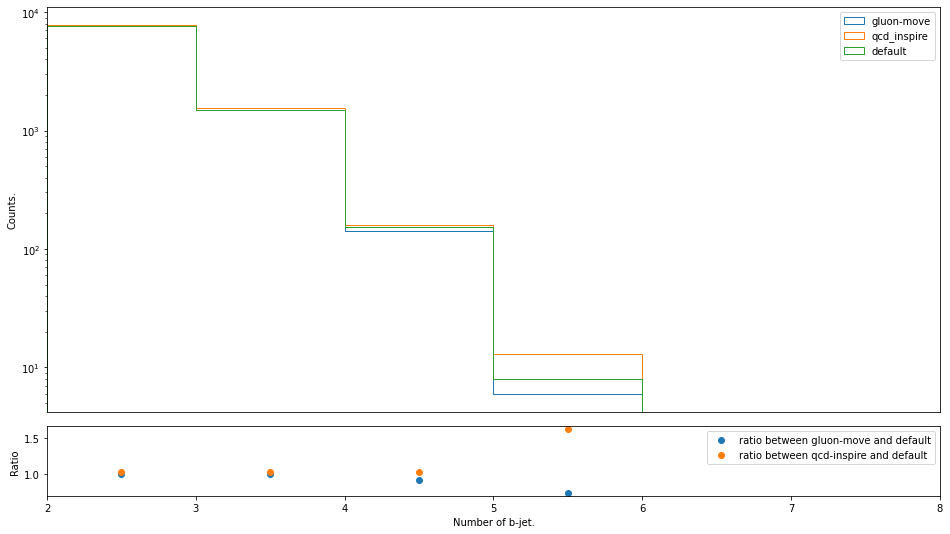

In [4]:
plt.figure(figsize=(16,9))
plt.subplot(6,1,(1,5))
h_1_1, w_1_1, p_1_1 = plt.hist(n_btag_cr_gluon, label='gluon-move', histtype='step', stacked=True, bins=[2,3,4,5,6])
h_1_2, w_1_2, p_1_2 = plt.hist(n_btag_cr_qcd, label='qcd_inspire', histtype='step', stacked=True, bins=[2,3,4,5,6])
h_1_3, w_1_3, p_1_3 = plt.hist(n_btag_default, label='default' , histtype='step', stacked=True, bins=[2,3,4,5,6])
plt.legend(loc='upper right')
plt.ylabel("Counts.")
plt.xlim(2,8)
plt.xticks([])
plt.yscale("log")
plt.subplot(6,1,6)
x_axis = np.array(w_1_1[:-1]) + 0.5
plt.scatter(x_axis, h_1_1/h_1_3, label='ratio between gluon-move and default')
plt.scatter(x_axis, h_1_2/h_1_3, label='ratio between qcd-inspire and default')
plt.xlim(2,8)
plt.ylabel("Ratio")
plt.legend(loc="upper right")
plt.xlabel("Number of b-jet.")
plt.show()

In [5]:
n_jet_cr_gluon = [len(x) for x in cr_gluon_jet.pt]
n_jet_cr_qcd = [len(x) for x in cr_qcd_jet.pt]
n_jet_default = [len(x) for x in default_jet.pt]

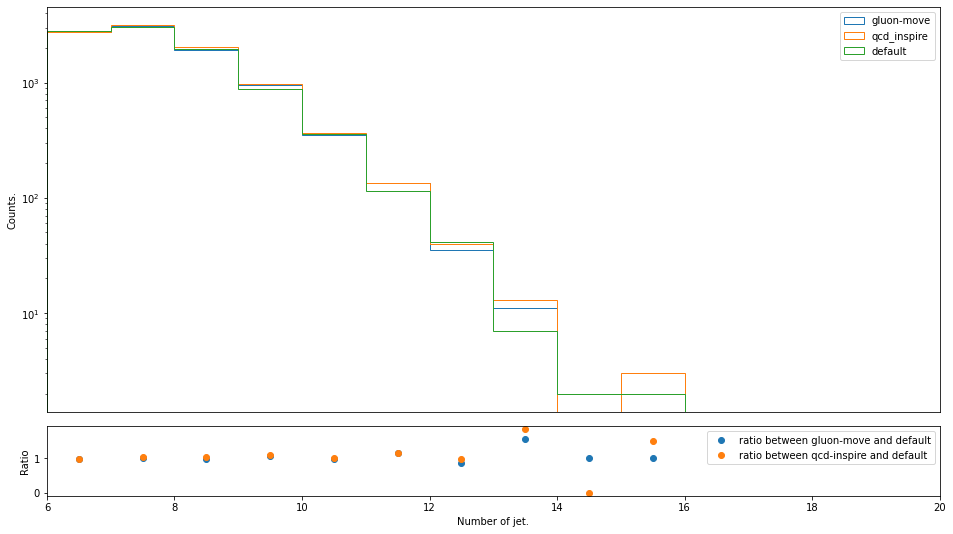

In [6]:
plt.figure(figsize=(16,9))
plt.subplot(6,1,(1,5))
h_2_1, w_2_1, p_2_1 = plt.hist(n_jet_cr_gluon, label='gluon-move', histtype='step', stacked=True, bins=[6,7,8,9,10,11,12,13,14,15,16])
h_2_2, w_2_2, p_2_2 = plt.hist(n_jet_cr_qcd, label='qcd_inspire', histtype='step', stacked=True, bins=[6,7,8,9,10,11,12,13,14,15,16])
h_2_3, w_2_3, p_2_3 = plt.hist(n_jet_default, label='default', histtype='step', stacked=True, bins=[6,7,8,9,10,11,12,13,14,15,16])
plt.legend(loc='upper right')
plt.ylabel("Counts.")
plt.yscale("log")
plt.xlim(6, 20)
plt.xticks([])
plt.subplot(6,1,6)
x_axis = np.array(w_2_1[:-1]) + 0.5
plt.scatter(x_axis, h_2_1/h_2_3, label='ratio between gluon-move and default')
plt.scatter(x_axis, h_2_2/h_2_3, label='ratio between qcd-inspire and default')
plt.legend(loc="upper right")
plt.ylabel("Ratio")
plt.xlabel("Number of jet.")
plt.xlim(6, 20)
plt.show()

In [7]:
leading_jet_pt_cr_gluon = [x[0] for x in cr_gluon_jet.pt]
leading_jet_pt_cr_qcd = [x[0] for x in cr_qcd_jet.pt]
leading_jet_pt_default = [x[0] for x in default_jet.pt]

<ipython-input-8-13c8504770ae>:13: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(x_axis, h_3_1/h_3_3, label='ratio between gluon-move and default')
<ipython-input-8-13c8504770ae>:13: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(x_axis, h_3_1/h_3_3, label='ratio between gluon-move and default')
<ipython-input-8-13c8504770ae>:14: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(x_axis, h_3_2/h_3_3, label='ratio between qcd-inspire and default')
<ipython-input-8-13c8504770ae>:14: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(x_axis, h_3_2/h_3_3, label='ratio between qcd-inspire and default')


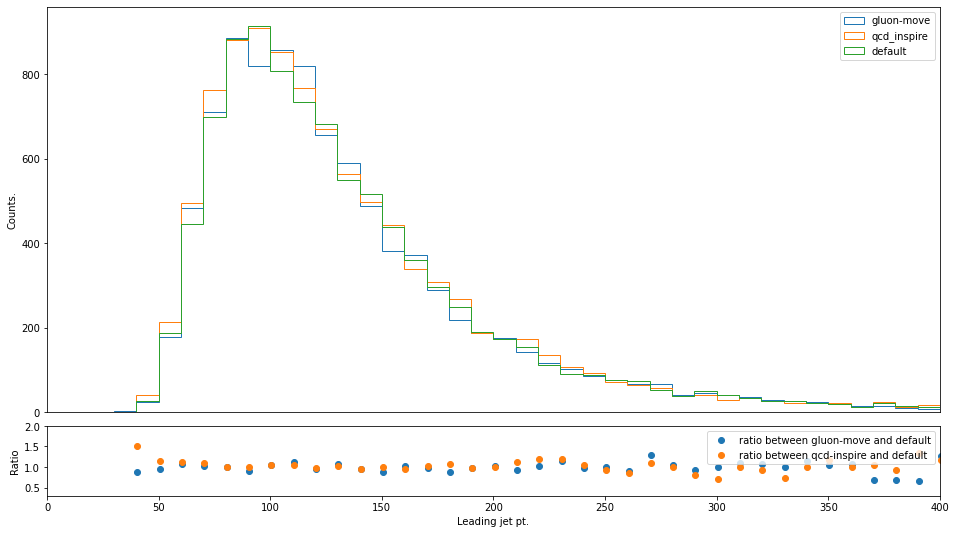

In [8]:
plt.figure(figsize=(16,9))
plt.subplot(6,1,(1,5))
bin_array = [10*i for i in range(101)]  
h_3_1, w_3_1, p_3_1 = plt.hist(leading_jet_pt_cr_gluon, label='gluon-move', bins=bin_array, histtype='step')
h_3_2, w_3_2, p_3_2 = plt.hist(leading_jet_pt_cr_qcd, label='qcd_inspire', bins=bin_array, histtype='step')
h_3_3, w_3_3, p_3_3 = plt.hist(leading_jet_pt_default, label='default', bins=bin_array, histtype='step')
plt.legend(loc='upper right')
plt.ylabel("Counts.")
plt.xlim(0, 400)
plt.xticks([])
plt.subplot(6,1,6)
x_axis = np.array(w_3_1[:-1]) + 0.5
plt.scatter(x_axis, h_3_1/h_3_3, label='ratio between gluon-move and default')
plt.scatter(x_axis, h_3_2/h_3_3, label='ratio between qcd-inspire and default')
plt.legend(loc="upper right")
plt.ylabel("Ratio")
plt.xlabel("Leading jet pt.")
plt.yticks([0.5,1,1.5,2])
plt.ylim(0.3,2)
plt.xlim(0, 400)
plt.show()

In [9]:
sub_leading_jet_pt_cr_gluon = [x[1] for x in cr_gluon_jet.pt]
sub_leading_jet_pt_cr_qcd = [x[1] for x in cr_qcd_jet.pt]
sub_leading_jet_pt_default = [x[1] for x in default_jet.pt]

<ipython-input-10-46983ef917ca>:13: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(x_axis, h_4_1/h_4_3, label='ratio between gluon-move and default')
<ipython-input-10-46983ef917ca>:13: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(x_axis, h_4_1/h_4_3, label='ratio between gluon-move and default')
<ipython-input-10-46983ef917ca>:14: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(x_axis, h_4_2/h_4_3, label='ratio between qcd-inspire and default')
<ipython-input-10-46983ef917ca>:14: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(x_axis, h_4_2/h_4_3, label='ratio between qcd-inspire and default')


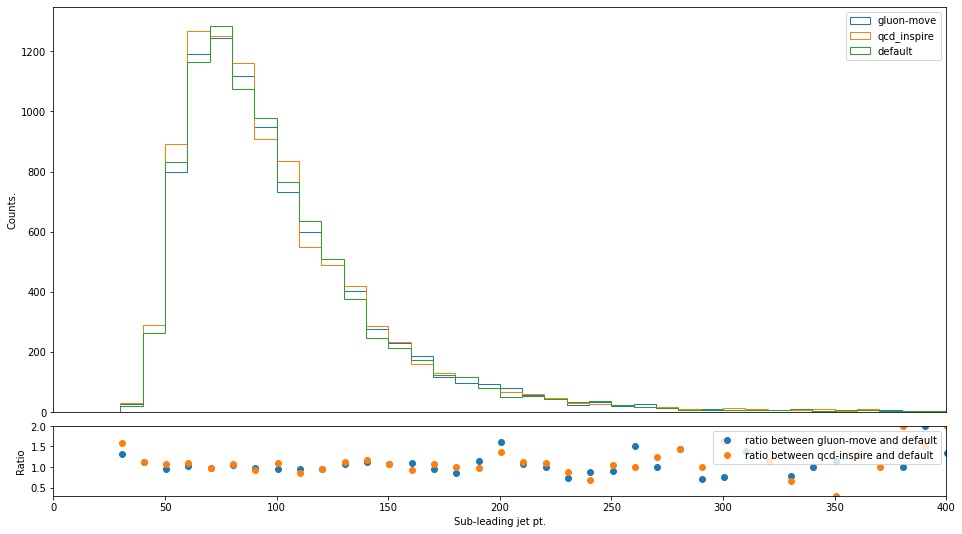

In [10]:
plt.figure(figsize=(16,9))
plt.subplot(6,1,(1,5))
bin_array = [10*i for i in range(101)]  
h_4_1, w_4_1, p_4_1 = plt.hist(sub_leading_jet_pt_cr_gluon, label='gluon-move', bins=bin_array, histtype='step')
h_4_2, w_4_2, p_4_2 = plt.hist(sub_leading_jet_pt_cr_qcd, label='qcd_inspire', bins=bin_array, histtype='step')
h_4_3, w_4_3, p_4_3 = plt.hist(sub_leading_jet_pt_default, label='default', bins=bin_array, histtype='step')
plt.legend(loc='upper right')
plt.ylabel("Counts.")
plt.xlim(0, 400)
plt.xticks([])
plt.subplot(6,1,6)
x_axis = np.array(w_4_1[:-1]) + 0.5
plt.scatter(x_axis, h_4_1/h_4_3, label='ratio between gluon-move and default')
plt.scatter(x_axis, h_4_2/h_4_3, label='ratio between qcd-inspire and default')
plt.legend(loc="upper right")
plt.ylabel("Ratio")
plt.xlabel("Sub-leading jet pt.")
plt.xlim(0, 400)
plt.yticks([0.5,1,1.5,2])
plt.ylim(0.3,2)
plt.show()